<a href="https://colab.research.google.com/github/RodrigoLefin/Clase1_Diplomado25-04-2022/blob/main/Prueba_recuperativa_python_herramientas_analisis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Prueba Recuperativa Python herramientas de análisis

### Nombre: Rodrigo Lefin Carrasco.

### Objetivo de la Prueba

Utilizando la base de datos CASEN 2017, realice un estudio que explique la brecha salarial,con las siguientes variables: y1, y2_dias, y2_hrs, sexo, edad, ch1.

Se pide que haga uso de todos los conocimientos abordados en clase y los que estime convenientes para generar un buen análisis. Para ello deberá, entregar estadística descriptiva de cada variable, darle formato correcto a los datos, visualizar valores atípicos ¿qué opina de los gráficos?, estandarizar e imputar si considera necesario; fundamentando cualquier decisión; corroborar la relación entre variables.

Finalmente, debe hacer entrega de un modelo de regresión simple y otro modelo de
regresión múltiple, ambos con predicciones y sus respectivos análisis en base a los valores obtenidos.

#### ¿Que se entiende por brecha Salarial?
Para responder a esta pregunta tomaremos el concepto definido por ONU Mujeres, el cual señala que La brecha salarial de género se define como la diferencia entre la mediana de los ingresos de los hombres y de las mujeres en relación con la mediana de los ingresos de los hombres.

En base a este concepto trabajaremos en el analisis de los datos.

#### 1. Identificar y Conectar Database

In [103]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [104]:
import numpy as np
import pandas as pd
import scipy
from scipy import stats
import sklearn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import seaborn as sns

In [105]:
df_CA17 = pd.read_csv('/content/drive/MyDrive/CASEN_2017.csv', sep=';', encoding='latin-1', engine='python', on_bad_lines='skip')

In [106]:
df_CA17.head(10)

,folio,o,id_vivienda,hogar,region,provincia,comuna,zona,expr,expc,...,hh_d_estado,hh_d_servbas,hh_d_entorno,hh_d_accesi,hh_d_medio,hh_d_appart,hh_d_tsocial,hh_d_seg,pobreza_multi_4d,pobreza_multi_5d
0,110110020201,1,1101100202,1,Región de Tarapacá,Iquique,Iquique,Urbano,39,33,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,NaN,NaN
1,110110020301,1,1101100203,1,Región de Tarapacá,Iquique,Iquique,Urbano,39,33,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Pobre,Pobre
2,110110020401,1,1101100204,1,Región de Tarapacá,Iquique,Iquique,Urbano,39,33,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,NaN,NaN
3,110110020401,2,1101100204,1,Región de Tarapacá,Iquique,Iquique,Urbano,39,33,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,NaN,NaN
4,110110020501,1,1101100205,1,Región de Tarapacá,Iquique,Iquique,Urbano,39,33,...,1.0,1.0,1.0,0.0,1.0,NaN,1.0,0.0,No pobre,NaN
5,110110020501,2,1101100205,1,Región de Tarapacá,Iquique,Iquique,Urbano,39,33,...,1.0,1.0,1.0,0.0,1.0,NaN,1.0,0.0,No pobre,NaN
6,110110020501,3,1101100205,1,Región de Tarapacá,Iquique,Iquique,Urbano,39,33,...,1.0,1.0,1.0,0.0,1.0,NaN,1.0,0.0,No pobre,NaN
7,110110020601,1,1101100206,1,Región de Tarapacá,Iquique,Iquique,Urbano,39,33,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,Pobre,Pobre
8,110110020601,2,1101100206,1,Región de Tarapacá,Iquique,Iquique,Urbano,39,33,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,Pobre,Pobre
9,110110020901,1,1101100209,1,Región de Tarapacá,Iquique,Iquique,Urbano,39,33,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN


In [107]:
df_CA17.tail(5)

,folio,o,id_vivienda,hogar,region,provincia,comuna,zona,expr,expc,...,hh_d_estado,hh_d_servbas,hh_d_entorno,hh_d_accesi,hh_d_medio,hh_d_appart,hh_d_tsocial,hh_d_seg,pobreza_multi_4d,pobreza_multi_5d
216434,1520130021601,1,15201300216,1,Región de Arica y Parinacota,Parinacota,Putre,Rural,7,4,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,Pobre,Pobre
216435,1520130021601,2,15201300216,1,Región de Arica y Parinacota,Parinacota,Putre,Rural,7,4,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,Pobre,Pobre
216436,1520130021701,1,15201300217,1,Región de Arica y Parinacota,Parinacota,Putre,Rural,7,4,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,Pobre,Pobre
216437,1520130021701,2,15201300217,1,Región de Arica y Parinacota,Parinacota,Putre,Rural,7,4,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,Pobre,Pobre
216438,1520130021801,1,15201300218,1,Región de Arica y Parinacota,Parinacota,Putre,Rural,7,4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No pobre,No pobre


#### 2. Reconocimiento de Columnas & Filas

In [108]:
print("Qty of rows, Columns", df_CA17.shape)
df_CA17.info()

Qty of rows, Columns (216439, 804)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216439 entries, 0 to 216438
Columns: 804 entries, folio to pobreza_multi_5d
dtypes: float64(147), int64(117), object(540)
memory usage: 1.3+ GB


In [109]:
print("Columns:", list(df_CA17.columns.values))

Columns: ['folio', 'o', 'id_vivienda', 'hogar', 'region', 'provincia', 'comuna', 'zona', 'expr', 'expc', 'expr_div', 'varstrat', 'varunit', 'fecha_dia', 'fecha_mes', 'fecha_año', 'tot_hog', 'tot_per', 'tot_par', 'tot_nuc', 'pres', 'marca', 'pco1', 'sexo', 'edad', 'h4m', 'h4a', 'ecivil', 'h6l', 'h6h', 'pareja', 'nucleo', 'pco2', 'h9a', 'h9a_esp', 'h9', 'h10a', 'h10b', 'h10c', 'h10d', 'h10e', 'h10f', 'e1', 'e2', 'e3', 'e4', 'e4_esp', 'e5a', 'e5a_esp', 'e5b', 'e6a', 'e6b', 'e7', 'e7_subarea', 'e7_cod_area', 'e8', 'e9nom', 'e9dir', 'e9com', 'e9com_c_cod', 'e9com_p_cod', 'e9rbd', 'e9rbd_sup', 'e9depen', 'e9dv', 'e9te', 'e9sup_g', 'e10', 'e11', 'e12a', 'e12b', 'e12c', 'e12d', 'e12e', 'e13a', 'e13b1', 'e13b1_esp', 'e13b2', 'e13b2_esp', 'e14pbu', 'e14pbt', 'e14pbd', 'e14pbm', 'e14bu', 'e14bt', 'e14bd', 'e14bm', 'e14bpc', 'e14mu', 'e14mt', 'e14md', 'e14mm', 'e15a', 'e15b', 'e16', 'e17', 'e18a', 'e18b', 'e19_1', 'e19_2', 'e0', 'o1', 'o2', 'o3', 'o4', 'o5', 'o6', 'o7r1', 'o7r2', 'o8', 'o9a', 'o9b

#### El reconocimiento de los datos está determinado por:

La base de datos tiene 216.439 observaciones (Filas), cada observación hace referencia a las viviendas en Chile.
También se puede observar que la base de datos posee 804 columnas, de las cuales 6 se desprendera el analisis de esta prueba:

#####1.y1: Ingresos de las viviendas.
#####2.y2_dias: días trabajados.
#####3.y2_hrs: horas trabajas.
#####4.sexo: Género de los encuestados.
#####5.edad: Edad de los encuestados. 
#####6.ch1: Situación Laboral.


##### Tipos de Datos:
##### Float: (147) Este tipo de dato se corresponde con números reales con parte decimal. Cabe destacar que el separador decimal en Python es el punto (.) y no la coma (,).
##### Int: (117) Este tipo de dato comprende el conjunto de todos los números enteros.
##### Object:(540) Secuencias de caracteres pueden contener números y / o caracteres.



#### 3. Limpieza y análisis de datos

##### Crear Dataframe para analizar las sólo las columnas que son parte del analisis.

In [110]:
df_CASEN17 = df_CA17[["y1","y2_dias", "y2_hrs", "sexo", "edad", "ch1"]]
df_CASEN17.head(5)

,y1,y2_dias,y2_hrs,sexo,edad,ch1
0,NaN,NaN,NaN,Mujer,56,Patrón o empleador/ Trabajador Cuenta Propia
1,200000,30,216,Mujer,21,Asalariado
2,270000,30,192,Hombre,24,Asalariado
3,300000,30,192,Hombre,28,Asalariado
4,320000,30,192,Hombre,26,Asalariado


In [111]:
df_CASEN17.isna().sum()


y1         147809
y2_dias    147809
y2_hrs     147809
sexo            0
edad            0
ch1             0
dtype: int64

###### Debido a que existen muchos valores NaN; imputaremos estas observaciones eliminandolas.
A nivel de porcentaje los NaN representan un 68,3% del total de la muestra; es por ello que es imprescindible crear otras estrategias (CASEN) para obtener una mayor calidad de los datos.

##### De aqui en adelante trabajaremos con el 31,7% de los datos.

In [112]:
df_CASEN17.dropna(inplace = True)
print (df_CASEN17.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68630 entries, 1 to 216429
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   y1       68630 non-null  object
 1   y2_dias  68630 non-null  object
 2   y2_hrs   68630 non-null  object
 3   sexo     68630 non-null  object
 4   edad     68630 non-null  int64 
 5   ch1      68630 non-null  object
dtypes: int64(1), object(5)
memory usage: 3.7+ MB
None


/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


Al revisar la data de ingresos, dias y horas trabajadas, se identificó que existen valores denominados "No sabe", por lo que se eliminaron.

In [113]:
lista_nosabe = []
arreglo=np.array(df_CASEN17['y1'])

for i in arreglo:
    if i == 'No sabe':
        lista_nosabe.append(True)
    else:
        lista_nosabe.append(False)
        
resultado= arreglo[lista_nosabe]
print(resultado)

lista_nosabe2 = []
arreglo=np.array(df_CASEN17['y2_dias'])

for i in arreglo:
    if i == 'No sabe':
        lista_nosabe2.append(True)
    else:
        lista_nosabe2.append(False)
        
resultado2= arreglo[lista_nosabe2]
print(resultado2)

lista_nosabe3 = []
arreglo=np.array(df_CASEN17['y2_dias'])

for i in arreglo:
    if i == 'No sabe':
        lista_nosabe3.append(True)
    else:
        lista_nosabe3.append(False)
        
resultado3= arreglo[lista_nosabe3]
print(resultado3)

['No sabe' 'No sabe' 'No sabe' ... 'No sabe' 'No sabe' 'No sabe']
['No sabe' 'No sabe' 'No sabe' ... 'No sabe' 'No sabe' 'No sabe']
['No sabe' 'No sabe' 'No sabe' ... 'No sabe' 'No sabe' 'No sabe']


In [114]:
y1_idx=df_CASEN17[df_CASEN17['y1']=='No sabe'].index
df_CASEN17=df_CASEN17.drop(y1_idx)

y2_dias_idx=df_CASEN17[df_CASEN17['y2_dias']=='No sabe'].index
df_CASEN17=df_CASEN17.drop(y2_dias_idx)

y2_hrs_idx=df_CASEN17[df_CASEN17['y2_hrs']=='No sabe'].index
df_CASEN17=df_CASEN17.drop(y2_hrs_idx)

In [115]:
df_CASEN17['y1'] = df_CASEN17['y1'].astype('int64')
df_CASEN17['y2_dias'] = df_CASEN17['y2_dias'].astype('int64')
df_CASEN17['y2_dias'] = df_CASEN17['y2_dias'].astype('int64')
df_CASEN17['y2_hrs'] = df_CASEN17['y2_hrs'].astype('int64')

In [116]:
print(df_CASEN17.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61108 entries, 1 to 216429
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   y1       61108 non-null  int64 
 1   y2_dias  61108 non-null  int64 
 2   y2_hrs   61108 non-null  int64 
 3   sexo     61108 non-null  object
 4   edad     61108 non-null  int64 
 5   ch1      61108 non-null  object
dtypes: int64(4), object(2)
memory usage: 3.3+ MB
None


##### Con la limpieza de datos realizado anteriormente, eliminando el registro de "No sabe" en las variables y1, y_dias, y_horas, se obtiene una nueva base de datos con 61.108 (28,2%) registros.

##### Identificación valores outliers variable Ingreso (y1)

L. inferior:  -135000.0
L. superior:  945000.0


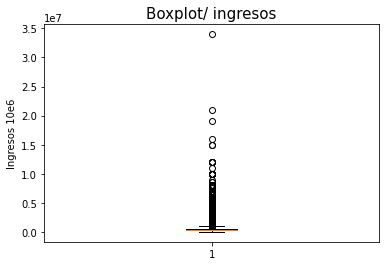

In [117]:
plt.boxplot(df_CASEN17.y1)
plt.title('Boxplot/ ingresos', fontsize=15)
plt.ylabel('Ingresos 10e6', fontsize=10)

#cuartiles
q3, q1 = np.percentile(df_CASEN17.y1, [75, 25])
dif = q3-q1
lim_sup = q3 + (1.5*dif)
lim_inf = q1 - (1.5*dif)

# limites
print('L. inferior: ', lim_inf)
print('L. superior: ', lim_sup)



##### Todos los valores identificados como outliers (inferiores y superiores) en la variable ingresos serán parte del análisis.

#### Estadística Básica

In [118]:
print(df_CASEN17.y1.describe())

count    6.110800e+04
mean     5.041878e+05
std      5.890359e+05
min      0.000000e+00
25%      2.700000e+05
50%      3.500000e+05
75%      5.400000e+05
max      3.400000e+07
Name: y1, dtype: float64


Para el caso de los ingresos se identifican que:
El promedio es de $500.000 aproximadamente.
Valor minimo de cero y valor maximo de 34 millones.

In [119]:
print(df_CASEN17.y2_dias.describe())

count    61108.000000
mean        22.593392
std          5.530789
min          1.000000
25%         20.000000
50%         21.000000
75%         26.000000
max         30.000000
Name: y2_dias, dtype: float64


#### Para el caso de los días de trabajo, se identifica que en promedio se trabajan 22,5 días; siendo un dato congruentes en base al horario estándar de trabajo (lunes a viernes)

In [120]:
print(df_CASEN17.y2_hrs.describe())

count    61108.000000
mean       167.775954
std         45.310416
min          1.000000
25%        160.000000
50%        180.000000
75%        180.000000
max        848.000000
Name: y2_hrs, dtype: float64


#### Para el caso de las horas de trabajo, se identifica que en promedio se trabajan 168 horas; siendo un dato congruente si se interpreta que se trabajan aproximadamente 8 horas diarias.

In [121]:
print(df_CASEN17.edad.describe())

count    61108.000000
mean        41.438568
std         13.420199
min         15.000000
25%         30.000000
50%         41.000000
75%         52.000000
max         99.000000
Name: edad, dtype: float64


##### En la variable edad se identifica que la edad promedio de los encuestados es de 41 años. Un punto interesante a destacar es que la edad minima es de 15 años y la edad maxima es de 99 años.

In [122]:
print(df_CASEN17.sexo.describe())

count      61108
unique         2
top       Hombre
freq       34462
Name: sexo, dtype: object


#### En relación al sexo, los encuestados en su mayoria con un 56,4% hombres.

## Brecha Salarial de Género 
#### Para realizar el analisis entre los hombres y mujeres vamos a crear dos dataframe 

In [123]:
df_CASEN17_H = df_CASEN17[df_CASEN17['sexo']=='Hombre']
df_CASEN17_M = df_CASEN17[df_CASEN17['sexo']=='Mujer']

In [124]:
mujer_ad = df_CASEN17_M[['y1','edad','y2_dias']]
mujer_ad.rename(columns={'y1':'y1_M'},inplace=True)

hombre_ad = df_CASEN17_H[['y1','edad','y2_dias']]
hombre_ad.rename(columns={'y1':'y1_H'},inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Luego vamos a agrupar según sexo, ingreso, edad y dias trabajados.

In [125]:
mujer_ad = mujer_ad.groupby(['edad','y2_dias'], as_index=False).mean()
hombre_ad = hombre_ad.groupby(['edad','y2_dias'], as_index=False).mean()

In [126]:
mujer_ad.head(10)

,edad,y2_dias,y1_M
0,15,10,30000.000000
1,15,12,110000.000000
2,15,24,158666.666667
3,16,4,20000.000000
4,16,7,80000.000000
5,16,8,80000.000000
6,16,10,12000.000000
7,16,12,50000.000000
8,16,15,100000.000000
9,16,20,135000.000000


In [127]:
hombre_ad.head(10)

,edad,y2_dias,y1_H
0,15,12,100000.000000
1,15,16,192000.000000
2,15,20,148200.000000
3,15,22,50000.000000
4,15,24,205750.000000
5,15,26,50000.000000
6,15,30,223333.333333
7,16,4,69000.000000
8,16,8,66666.666667
9,16,12,60000.000000


Concatenación de dataframes

In [128]:
dif_salarial = pd.merge(left=mujer_ad ,right=hombre_ad, how='outer')

In [129]:
print(dif_salarial.info())
print(dif_salarial.head(10))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1519 entries, 0 to 1518
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   edad     1519 non-null   int64  
 1   y2_dias  1519 non-null   int64  
 2   y1_M     1238 non-null   float64
 3   y1_H     1326 non-null   float64
dtypes: float64(2), int64(2)
memory usage: 59.3 KB
None
   edad  y2_dias           y1_M           y1_H
0    15       10   30000.000000            NaN
1    15       12  110000.000000  100000.000000
2    15       24  158666.666667  205750.000000
3    16        4   20000.000000   69000.000000
4    16        7   80000.000000            NaN
5    16        8   80000.000000   66666.666667
6    16       10   12000.000000            NaN
7    16       12   50000.000000   60000.000000
8    16       15  100000.000000            NaN
9    16       20  135000.000000   55500.000000


In [130]:
dif_salarial.isna().sum()

edad         0
y2_dias      0
y1_M       281
y1_H       193
dtype: int64

In [131]:
dif_salarial.dropna(inplace = True)
print(dif_salarial.info())
print(dif_salarial.isna().sum())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1045 entries, 1 to 1235
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   edad     1045 non-null   int64  
 1   y2_dias  1045 non-null   int64  
 2   y1_M     1045 non-null   float64
 3   y1_H     1045 non-null   float64
dtypes: float64(2), int64(2)
memory usage: 40.8 KB
None
edad       0
y2_dias    0
y1_M       0
y1_H       0
dtype: int64


In [132]:
print('filas, columnas del dataset ahora: ', dif_salarial.shape)

filas, columnas del dataset ahora:  (1045, 4)


Al analizar el dataframe concatenado; se identifica que la base de datos se ordeno respecto a las variables asignadas.
Generanso asi una base de datos de con 1045 observaciones distribuidos en 4 columnas.

Es necesario identificar la diferencia entre los salarios por genero y tambien por edad y situación laboral.

In [133]:
dif_salarial = dif_salarial.assign(brecha_salarial = dif_salarial.y1_H - dif_salarial.y1_M)

In [134]:
dif_salarial.head(10)

,edad,y2_dias,y1_M,y1_H,brecha_salarial
1,15,12,110000.000000,100000.000000,-10000.000000
2,15,24,158666.666667,205750.000000,47083.333333
3,16,4,20000.000000,69000.000000,49000.000000
5,16,8,80000.000000,66666.666667,-13333.333333
7,16,12,50000.000000,60000.000000,10000.000000
9,16,20,135000.000000,55500.000000,-79500.000000
10,16,24,360000.000000,55000.000000,-305000.000000
14,17,6,288000.000000,0.000000,-288000.000000
15,17,8,57500.000000,82400.000000,24900.000000
17,17,12,50000.000000,60500.000000,10500.000000


In [135]:
print('Estadística básica Brecha Salarial: ', dif_salarial.brecha_salarial.describe())

Estadística básica Brecha Salarial:  count    1.045000e+03
mean     1.151829e+05
std      4.076879e+05
min     -4.295000e+06
25%     -1.015098e+04
50%      8.535714e+04
75%      2.100000e+05
max      3.726000e+06
Name: brecha_salarial, dtype: float64


Al analizar las estadistica basica del nuevo dataframe se identifica que en promedio, los hombres ganan 115.000 más que las mujeres.

#### Analizar la relacion entre las variable.
Se utilizará la correlacion de person para determinar este analisis

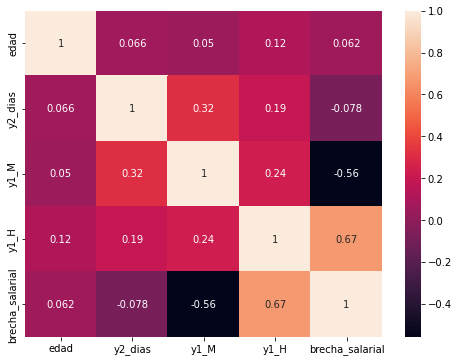

In [136]:
df_correlacion = dif_salarial.corr(method='pearson')
plt.figure(figsize=(8, 6))
sns.heatmap(df_correlacion, annot=True)
plt.show()

Al analizar el grafico se observa que la variable dias trabajados representan un 32% & edad representa un 12% en impacto que determina la brecha salarial.

Text(0, 0.5, 'Brecha Salarial')

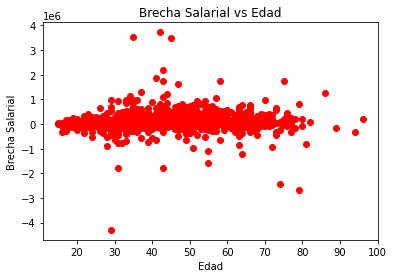

In [137]:
plt.plot(dif_salarial.edad,dif_salarial.brecha_salarial, 'o', color='red')
plt.title('Brecha Salarial vs Edad')
plt.xlabel('Edad')
plt.ylabel('Brecha Salarial')


In [138]:
## correlacion 
r, p = stats.pearsonr(dif_salarial.edad, dif_salarial.brecha_salarial)
print(f"Correlación de Pearson: r={r}, p-value={p}")

Correlación de Pearson: r=0.06181324448813034, p-value=0.04574676490675834


Según el gráfico y la correlación de Pearson es posible establecer hay una relación baja y positiva entre la Edad y su impacto en la variabilidad de la brecha salarial, alcanzando un 0,06.

Al analizar el p-values, la correlación es significativa dado  que el valor es menor a 0,05.

####Modelo de Regresion Lineal

In [139]:
x = dif_salarial.brecha_salarial
y = dif_salarial.edad

x = x.to_numpy().reshape((-1, 1))

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
print(x_train[:])

[[ 1.90000000e+05]
 [ 2.42500000e+05]
 [ 1.48000000e+05]
 [ 5.21666667e+05]
 [ 1.40000000e+05]
 [ 6.72666667e+05]
 [ 3.98000000e+05]
 [ 2.50000000e+04]
 [ 1.90158063e+05]
 [-8.06000000e+04]
 [ 6.60324406e+04]
 [-1.02000000e+05]
 [ 6.46515152e+04]
 [ 2.19000000e+05]
 [ 1.43856899e+04]
 [ 2.21000000e+05]
 [ 3.69523810e+05]
 [ 5.85000000e+05]
 [-2.44733333e+05]
 [ 1.55714286e+05]
 [-4.75000000e+04]
 [ 6.77333333e+05]
 [ 1.47250000e+05]
 [ 1.67500000e+05]
 [ 3.00000000e+05]
 [ 3.86134454e+04]
 [ 2.70911120e+04]
 [-7.95000000e+04]
 [ 7.65135196e+04]
 [ 1.30000000e+05]
 [ 2.83333333e+04]
 [ 3.50000000e+05]
 [ 9.02307692e+04]
 [-6.00000000e+04]
 [ 4.64869565e+04]
 [-1.16666667e+05]
 [ 9.59870629e+04]
 [ 5.18722222e+05]
 [ 2.15691704e+05]
 [ 6.50000000e+04]
 [ 9.48286275e+04]
 [ 1.46666667e+05]
 [ 3.10444731e+05]
 [ 1.81648007e+05]
 [ 6.25833333e+04]
 [-3.11000000e+04]
 [-1.50000000e+05]
 [ 2.02276480e+05]
 [ 1.11843137e+05]
 [-2.14285714e+04]
 [-2.70000000e+04]
 [ 9.15000000e+04]
 [ 1.1750000

In [140]:
mod_1 = LinearRegression()

mod_1.fit(x_train, y_train)
r2 = mod_1.score(x_train, y_train)
print("coeficiente de determinación : {} ".format(r2))
print("interceptor: {} ".format(mod_1.intercept_))
print("inclinacion: {} ".format(mod_1.coef_))


coeficiente de determinación : 0.0066294584981965166 
interceptor: 42.85745778712707 
inclinacion: [3.27571056e-06] 


Al revisar el R´2 de 0,0066 indica que nuestro modelo es débil, por ende no es un buen predictor. 
Esto se habia identificado con la correlacion de 0,06.

Predicción del Modelo Lineal

In [141]:
predict_1 = mod_1.predict(x_test)
print("Respuesta de predicción:\n {} ".format(predict_1))


y_predic = mod_1.intercept_ + mod_1.coef_ * x_test
print("respuesta de la prediccion:\n {}".format(y_predic))

Respuesta de predicción:
 [43.03720549 34.86472403 39.25417617 44.0784789  42.23507278 43.18692589
 43.14990315 43.24491975 42.95500117 43.03330339 42.62815805 42.50441808
 41.98393497 43.43998831 42.730524   42.95722454 42.73700646 43.11646063
 42.93899486 42.67319907 43.09986037 42.80613832 43.65987585 43.36191721
 43.43211101 43.01168916 37.0594501  42.79631119 43.1379405  42.27016968
 43.26778418 43.0675835  43.94253691 43.33498359 43.62179025 43.06382755
 43.56231539 44.00278659 42.72642936 43.13706308 43.26317794 44.67766095
 43.34881437 44.73870188 43.3642756  44.11556462 43.70680274 43.32086164
 46.0873084  43.49947404 43.58138982 54.24055197 43.67131532 42.75264979
 43.47403462 42.13953122 43.18502884 42.98848621 42.22196994 42.18102356
 42.95582341 42.86096748 43.78557578 43.18066123 43.05400042 43.79783937
 43.61742264 42.68466406 43.16311226 42.62815805 42.80013285 43.25054305
 44.55918942 42.90004202 43.47110756 42.82116759 44.77047275 42.91150701
 43.36855683 41.95663738 

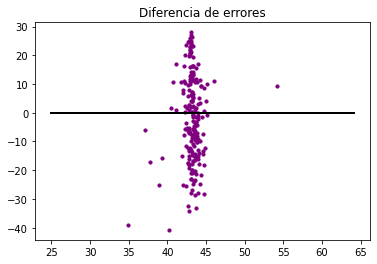

In [142]:
## grafico
plt.scatter(predict_1, predict_1 - y_test, color = "purple", s = 10, label = 'Test data')
## Línea horizontal
plt.hlines(y = 0, xmin = min(predict_1)-10, xmax = max(predict_1)+10, linewidth = 2)
plt.title("Diferencia de errores")
plt.show()

Al revisar el grafico se idnetifica que el modelo 1 no es un buen predictor dado que no existe una correlacion.

##Modelo de regresión
Este modelo se desarrollará con edad,  y la brecha salarial

In [143]:
# preparar variables dependiente e independiente
x2 = dif_salarial[['edad', 'y2_dias']]
y2 = dif_salarial['brecha_salarial']

x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, test_size=0.2, random_state=0)
print(x2_train[:])

      edad  y2_dias
174     25        5
687     47        3
563     41       27
296     29       29
732     48       29
...    ...      ...
1207    78       20
883     55       14
964     59        6
652     45       19
793     51       18

[836 rows x 2 columns]


In [144]:
mod_2 = LinearRegression()

mod_2.fit(x2_train, y2_train)
r2_2 = mod_2.score(x2_train, y2_train)
print("coeficiente de determinación : {} ".format(r2_2))
print("interceptor: {} ".format(mod_2.intercept_))
print("inclinacion: {} ".format(mod_2.coef_))

coeficiente de determinación : 0.017224093619444547 
interceptor: 115753.76163753466 
inclinacion: [ 2145.12477485 -4977.95273132] 


El R´2 es de un 0,017 lo cual indica que nuestro modelo es debil y requiere mucho ajuste.

In [145]:
predict_2 = mod_2.predict(x2_test)
print("Respuesta de predicción:\n {} ".format(predict_2))

y_pred2 = mod_2.intercept_ + mod_2.coef_ * x2_test
print("respuesta de la prediccion:\n {}".format(y_pred2))

Respuesta de predicción:
 [ 58491.51455668 164978.03488773 139154.52235946 119324.72666422
  48453.59386402  75652.51275551 148258.69418044 116573.91393778
 143034.69575905 118719.03871263  76504.24639717 129034.58643678
  94106.90208753 104308.85324024 198807.93990524  70592.54479417
  99412.91573895 157772.94215153  15753.04951966 224549.43720348
 141577.2741658  175981.28579349 144574.13258231 160195.69395788
 180435.56580324  28459.76770873  93501.21413595  24939.23657066
 143526.78713919  59948.93614993  28623.79816878  45784.79636761
 185249.48807451  81482.19912849 197432.53354202  45702.78113758
 144902.19350241 163356.58283444 124498.291197   118308.96256251
 170315.62988056  70756.57525422 123892.60324541 172788.81557551
  92813.51095434 119766.38415575 106125.917095   117621.2593809
  46472.49954922 123450.94575388 114952.46188449  67923.74729775
 117015.57142932 161457.50374966  89292.97981627  98561.18209729
  27772.06452712 139432.14939095  94270.93254758 147406.96053878


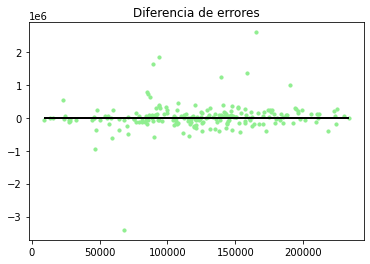

In [146]:
plt.scatter(predict_2, predict_2 - y2_test, color = "lightgreen", s = 10, label = 'Test data')


plt.hlines(y = 0, xmin = min(predict_2)-10, xmax = max(predict_2)+10, linewidth = 2)
plt.title("Diferencia de errores")
plt.show()

#### Conclusión:

Es importante indicar que la base de datos estuvo sometida a limpieza de ciertos datos que no agregan valor (NaN;"No sabe") Por lo que la muesta se redujo.

Al construir el calculo "diferencia salarial" y modelarlos a través de regresión lineal y multiple se determino que no son buenos modelos debido a la correlación y poca significancia.

Si bien se puede determinar que si existe una diferencia entre los ingresos de las mujeres y hombres con una diferencia de 115.000.

Pero para obtener un modelo más exacto es necesario incluir más variables para su analisis.